<a href="https://colab.research.google.com/github/Kapservl/Kapservl.github.io/blob/main/Deep%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification accuracy: 80.40%
Pairwise distances between centers:
 [[ 0.         14.44960797  9.33455587  9.14373367 10.76984444  7.51929626
   8.15444313 11.86455505  9.90790174 11.48887494]
 [14.44960797  0.         10.12532258 11.7332329  10.17378643 11.11880041
  10.61470037 10.74315367 10.08677677  9.9320937 ]
 [ 9.33455587 10.12532258  0.          8.17828489  7.93254148  7.90679632
   7.33180754  8.87253107  7.07751618  8.88774785]
 [ 9.14373367 11.7332329   8.17828489  0.          9.0876078   6.11875002
   9.30206473  8.92240093  7.02042489  8.35435012]
 [10.76984444 10.17378643  7.93254148  9.0876078   0.          8.00151741
   8.78223265  7.58301228  7.38090899  6.01040793]
 [ 7.51929626 11.11880041  7.90679632  6.11875002  8.00151741  0.
   6.69869172  9.21195402  6.96738648  8.25853807]
 [ 8.15444313 10.61470037  7.33180754  9.30206473  8.78223265  6.69869172
   0.         10.8882374   8.58722228 10.44000352]
 [11.86455505 10.74315367  8.87253107  8.92240093  7.58301228  9

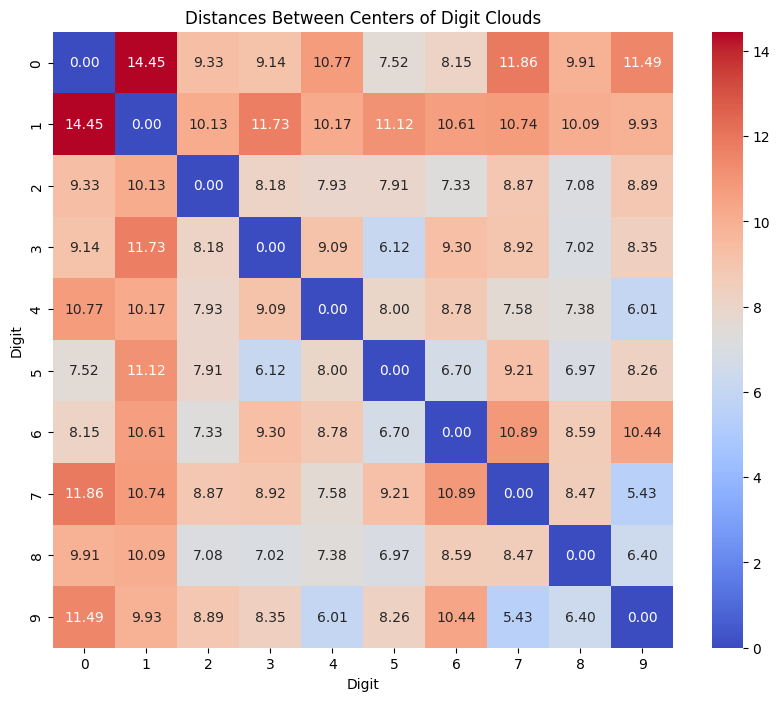

Most difficult digit pairs to separate based on center distances:


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training and test datasets (assumes the data is already loaded from the correct files)
X_train = pd.read_csv('train_in.csv', header=None).values  # Training images (16x16 flattened to 256)
y_train = pd.read_csv('train_out.csv', header=None).values.flatten().astype(int)  # Training labels

X_test = pd.read_csv('test_in.csv', header=None).values  # Test images (16x16 flattened to 256)
y_test = pd.read_csv('test_out.csv', header=None).values.flatten().astype(int)  # Test labels

# Step 1: Calculate the centers (mean vectors) for each digit (0-9)
num_classes = 10  # Digits 0 through 9
num_features = X_train.shape[1]  # 256-dimensional space
centers = np.zeros((num_classes, num_features))

# Calculate the center for each digit class
for d in range(num_classes):
    centers[d] = X_train[y_train == d].mean(axis=0)

# Step 2: Classify each image in the test dataset using the nearest center
def classify_image(image, centers):
    # Calculate distances from the image to each center
    distances = np.linalg.norm(centers - image, axis=1)
    # Return the label of the closest center
    return np.argmin(distances)

# Classify all images in the test set
y_pred = np.array([classify_image(image, centers) for image in X_test])

# Step 3: Evaluate the classification accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Classification accuracy: {accuracy * 100:.2f}%')

# Step 4: Calculate distances between each pair of centers
distances_between_centers = cdist(centers, centers, metric='euclidean')
print("Pairwise distances between centers:\n", distances_between_centers)

# Step 5: Visualize the distances between centers
plt.figure(figsize=(10, 8))
sns.heatmap(distances_between_centers, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Distances Between Centers of Digit Clouds')
plt.xlabel('Digit')
plt.ylabel('Digit')
plt.show()

# Step 6: Analyze which digits are most difficult to separate based on distances
# Find the smallest non-zero distance pairs, indicating the closest and thus most confusable digits
min_distance_pairs = np.unravel_index(
    np.argsort(distances_between_centers, axis=None), distances_between_centers.shape
)

# Display the closest digit pairs and their distances
print("Most difficult digit pairs to separate based on center distances:")
for i in range(10):
    d1, d2 = min_distance_pairs[0][i], min_distance_pairs[1][i]
    if d1 != d2:  # Skip diagonal entries (distance of a center to itself)
        print(f"Digits {d1} and {d2} with distance: {distances_between_centers[d1, d2]:.2f}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


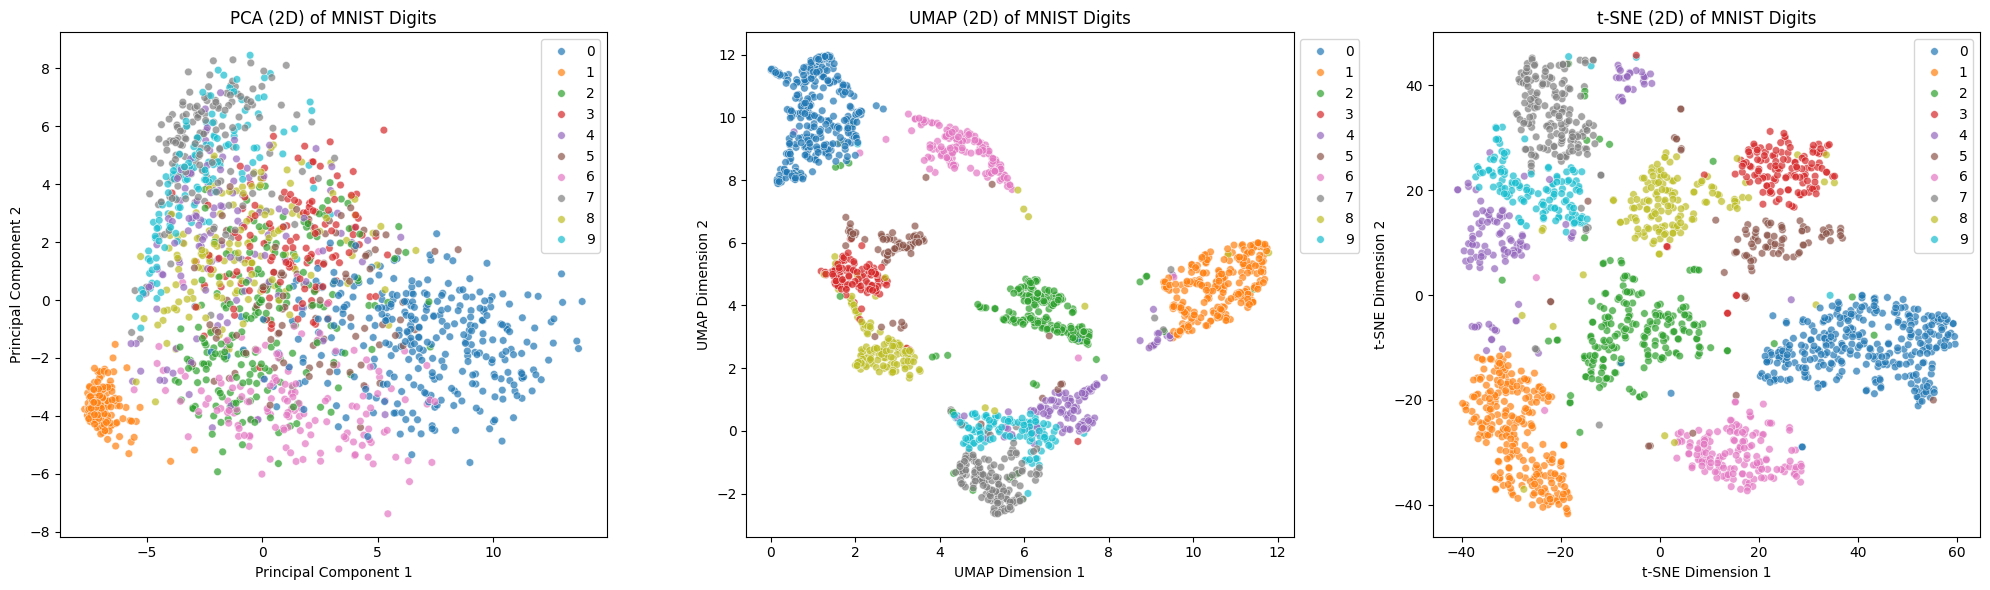

In [ ]:
!pip install umap-learn scikit-learn matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap as umap

# Step 1: Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Step 2: Apply UMAP to reduce to 2D
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_train)

# Step 3: Apply t-SNE to reduce to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_train)

# Step 4: Visualize the results
plt.figure(figsize=(20, 6))

# Plot PCA results
plt.subplot(1, 3, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette='tab10', s=30, alpha=0.7)
plt.title('PCA (2D) of MNIST Digits')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best', bbox_to_anchor=(1, 1))

# Plot UMAP results
plt.subplot(1, 3, 2)
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y_train, palette='tab10', s=30, alpha=0.7)
plt.title('UMAP (2D) of MNIST Digits')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(loc='best', bbox_to_anchor=(1, 1))

# Plot t-SNE results
plt.subplot(1, 3, 3)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_train, palette='tab10', s=30, alpha=0.7)
plt.title('t-SNE (2D) of MNIST Digits')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(loc='best', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()
